# E2-1. 손글씨 분류하기
- AIFFEL 두번째 exploration 중 1번째 프로젝트.
- scikitlearn의 toy datasets 중 손글씨 데이터셋을 분류해보기.
- scikitlearn API에서 5가지 모델(decision tree, random forest, SVM, SGD Classifier, Logistic Regression)을 활용함.

## 1. 모델 훈련 전 데이터 준비하기

In [27]:
# 모듈 import
import sklearn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [28]:
# digits 데이터 가져오기
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [29]:
# X는 feature data, y는 label data
X = digits.data
y = digits.target

# Target Names 출력
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [30]:
# 데이터 describe (feature 데이터 X 와 label 데이터 y의 shape 알아보기)
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [31]:
print(digits.DESCR) # digits datasets에 대한 설명 프린트

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

라벨은  0 입니다.


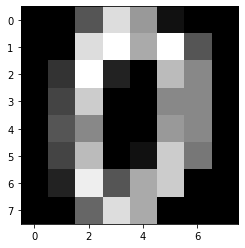

In [32]:
# feature 데이터와 label 데이터의 0번째 인덱스 확인
plt.imshow(X[0].reshape(8, 8), cmap = 'gray')
print("라벨은 ", y[0], "입니다.")
plt.show()

In [33]:
# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

## 2. scikit-learn 머신러닝 모델 학습, 예측, 평가
- 각 모델의 분류 결과에 대해 평가할 때, precision, recall, f1-score과 accuracy를 살펴볼 수 있다.
- 이 중 손글씨 분류기는 precision과 recall의 조화평균인 f1-score과 accuracy가 높은 모델일수록 좋다고 생각한다.  
  왜냐하면, precision = TP / (TP + FP), recall = TP / (TP + FN) 인데, 손글씨 분류기에서는 맞는 걸 아니라고 하든 틀린걸 맞다고 하든 둘다 똑같이 잘못판단한 것이므로 두개 다 반영해야 한다. 덧붙이면, positive 혹은 negative 중 어떤걸 더 정확하게 맞춰야하는지가 문제되지 않기 때문에 f1-score 혹은 accuracy 두 지표로 모델을 평가해야 한다.

### 1) Decision Tree Model

In [34]:
# Decision Tree 모델로 학습
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred=decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        32
           1       0.93      0.72      0.81        36
           2       0.96      0.73      0.83        30
           3       0.74      0.83      0.78        41
           4       0.80      0.88      0.84        32
           5       0.90      0.93      0.91        46
           6       0.93      0.88      0.90        32
           7       0.90      0.93      0.91        40
           8       0.77      0.81      0.79        42
           9       0.69      0.76      0.72        29

    accuracy                           0.84       360
   macro avg       0.85      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360

[[30  0  0  1  1  0  0  0  0  0]
 [ 0 26  0  1  2  2  0  0  3  2]
 [ 0  1 22  3  1  1  0  1  1  0]
 [ 0  0  0 34  0  1  0  1  3  2]
 [ 0  0  0  1 28  0  1  1  0  1]
 [ 2  0  0  0  0 43  0  0  1  0]
 [ 0  0  0  1  1  1 28  0  1  0]
 [ 0  0  0

### 2) Random Forest Model

In [35]:
# Random Forest 모델로 학습
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred=random_forest.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        30
           3       0.98      0.98      0.98        41
           4       0.94      0.97      0.95        32
           5       1.00      0.98      0.99        46
           6       1.00      0.97      0.98        32
           7       0.98      1.00      0.99        40
           8       0.93      0.98      0.95        42
           9       1.00      0.93      0.96        29

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360

[[30  0  0  0  2  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  0  1  0]
 [ 0  0  0  0 31  0  0  1  0  0]
 [ 0  0  0  0  0 45  0  0  1  0]
 [ 1  0  0  0  0  0 31  0  0  0]
 [ 0  0  0

### 3) SVM (Support Vector Machine)

In [36]:
# SVM 모델로 학습
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred=svm_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        41
           4       0.97      1.00      0.98        32
           5       0.98      1.00      0.99        46
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        40
           8       0.98      0.95      0.96        42
           9       1.00      0.93      0.96        29

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

[[31  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  0]
 [ 0  0  0  0 32  0  0  0  0  0]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 32  0  0  0]
 [ 0  0  0

### 4) SGD Classifier (Stochastic Gradient Descent Classifier)

In [37]:
# SGD Classifier 모델로 학습
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred=sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.90      1.00      0.95        36
           2       0.97      1.00      0.98        30
           3       1.00      0.95      0.97        41
           4       1.00      1.00      1.00        32
           5       0.95      0.91      0.93        46
           6       1.00      1.00      1.00        32
           7       1.00      0.97      0.99        40
           8       0.95      0.95      0.95        42
           9       0.93      0.93      0.93        29

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

[[32  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  1  0  0  1  0]
 [ 0  0  0  0 32  0  0  0  0  0]
 [ 0  2  1  0  0 42  0  0  0  1]
 [ 0  0  0  0  0  0 32  0  0  0]
 [ 0  0  0

### 5) Logistic Regression

In [40]:
# Logistic Regression 모델로 학습
logistic_model = LogisticRegression(solver='newton-cg')
logistic_model.fit(X_train, y_train)
y_pred=logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.92      0.97      0.95        36
           2       0.97      1.00      0.98        30
           3       0.95      1.00      0.98        41
           4       0.97      0.97      0.97        32
           5       0.98      0.98      0.98        46
           6       1.00      1.00      1.00        32
           7       0.97      0.97      0.97        40
           8       1.00      0.90      0.95        42
           9       0.96      0.93      0.95        29

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

[[32  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  1  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  0]
 [ 0  0  0  0 31  0  0  1  0  0]
 [ 0  0  0  1  0 45  0  0  0  0]
 [ 0  0  0  0  0  0 32  0  0  0]
 [ 0  0  0

## 3. 회고
- 5가지 모델로 숫자 손글씨를 학습하고, 테스트해본 결과는 다음과 같다.
- f1-score 및 accuracy 가 높은 순으로 순위를 매기면,  
  SVM (f1-score: 99%, accuracy: 99%),  
  Logistic Regression (f1-score: 97%, accuracy: 97%),  
  SGD Classifier (f1-score: 97%, accuracy: 97%),  
  Random Forest Classifier (f1-score: 97%, accuracy: 97%),  
  Decision Tree Classifier (f1-score: 84%, accuracy: 84%)
- SVM 모델이 숫자 손글씨를 가장 잘 분류하는 것으로 보인다.